#**Maestría en Inteligencia Artificial Aplicada (MNA) - Tecnológico de Monterrey**

##**Curso: Visión computacional para imágenes y video**

###**Profesor:** Dr. Gilberto Ochoa Ruiz


### **2.2 |  Simple_ImgProcessing**

###**Equipo 09**

###**Alumnos:**

* Víctor Hugo Soto Herrera (**A01706446**)
* Carolina Lucas Dophe (**A01702450**)
* Gerardo Tenorio Castillo (**A01139576**)
* César Bryam Rodriguez Aybar (**A01795980**)

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

# PIL Modules
from PIL import Image
from PIL import ImageFilter

# Modulo importado para resolver problemas al mostrar imágenes con cv2 por un bug con
# JUPYTER notebook
from google.colab.patches import cv2_imshow

## Loading Images <a class="anchor" id="loading"></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/MaestriaIA/Trimestre 8/Visión Computacional/img')

<class 'numpy.ndarray'>


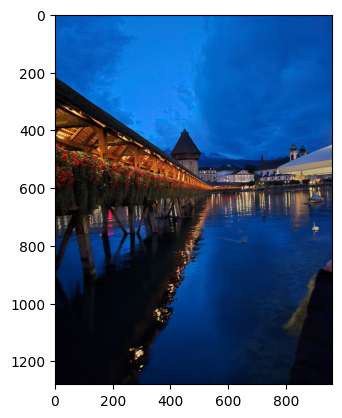

In [4]:
img1 = mpimg.imread("LucernePuente.jpeg")
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [5]:
img1.shape

(1280, 960, 3)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

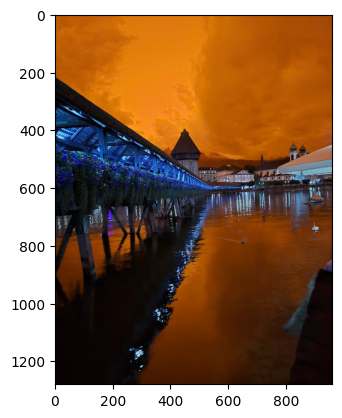

In [6]:
img2 = cv2.imread("LucernePuente.jpeg")
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(1280, 960, 3))


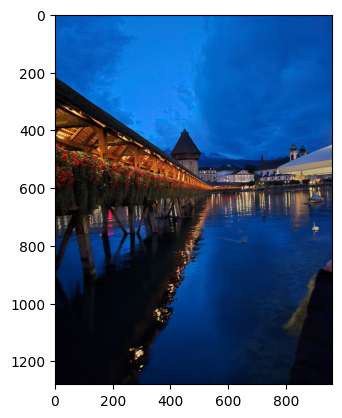

In [7]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.JpegImagePlugin.JpegImageFile'>


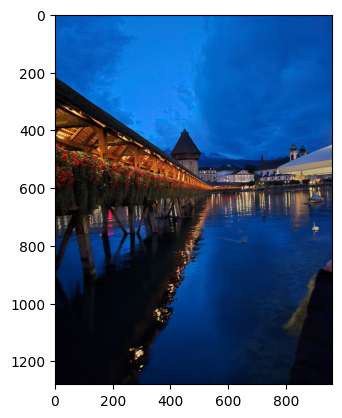

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open("LucernePuente.jpeg")
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [9]:
img3 = np.array(img3)
img3.shape

(1280, 960, 3)

Saving a numpy array in an optimized format, should you need to persist images into storage

<class 'numpy.ndarray'>


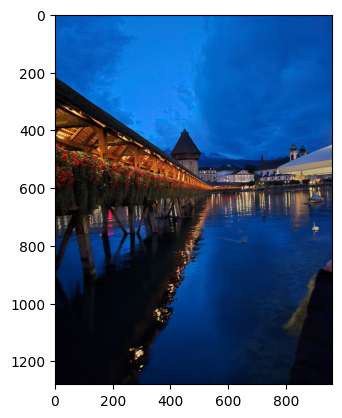

In [10]:
# Save the image
numpySavePath = "NumpyImg.npy"
np.save(numpySavePath, img3)

# Load the image
img3 = np.load(numpySavePath)

# Print and show image and the type of variable we are storing it in.
plt.imshow(img3)
print(type(img3))

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 960 x 1280
New size: 200 x 200


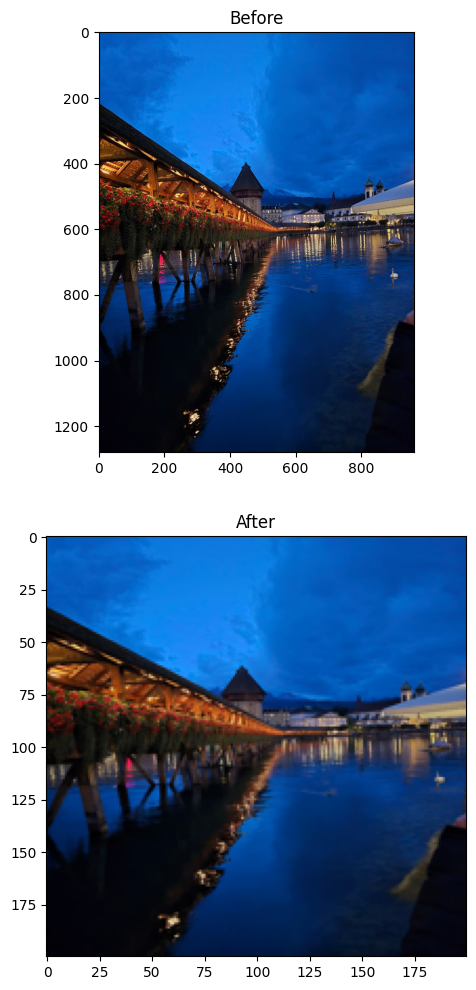

In [11]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 960 x 1280
Scaled size: 150 x 200
New size: 200 x 200


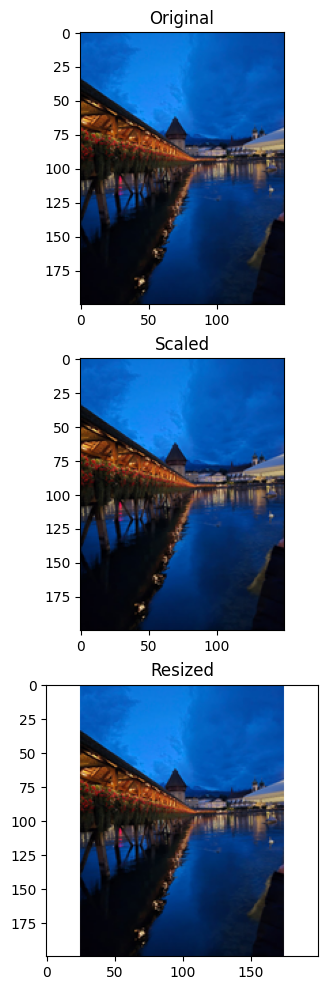

In [12]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
scaled_img.thumbnail(target_size, Image.LANCZOS) # Antialias was removed from Pill as from version 10.0.0, using LANCZOS now.
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## Negative Images <a class="anchor" id="negative"></a>

In [13]:
orig_img = cv2.imread("LucernePuente.jpeg")
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

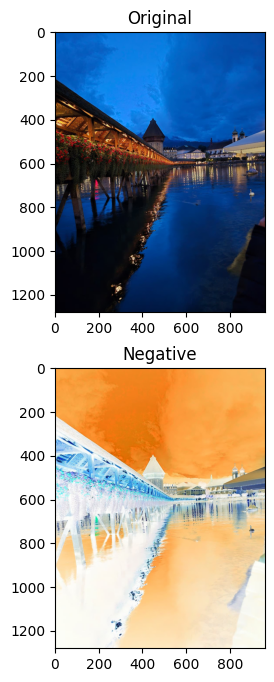

In [14]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [15]:
# Compute log
def logTransform(c, f):
    g = c * math.log(float(1 + f),10);
    return g;

# Apply logarithmic transformation for an image
def logTransformImage(image, outputMax = 255, inputMax=255):
    c = outputMax/math.log(inputMax+1,10);

    # Read pixels and apply logarithmic transformation
    for i in range(0, image.size[0]-1):
        for j in range(0, image.size[1]-1):
            # Get pixel value at (x,y) position of the image
            f = image.getpixel((i,j));

            # Do log transformation of the pixel
            redPixel    = round(logTransform(c, f[0]));
            greenPixel  = round(logTransform(c, f[1]));
            bluePixel   = round(logTransform(c, f[2]));

            # Modify the image with the transformed pixel values
            image.putpixel((i,j),(redPixel, greenPixel, bluePixel));

    return image;

In [16]:
# Instead of CV2 we use PIL as CV2 encounters overflows to transofrmations of RGB values
pilImage = Image.open("LucernePuente.jpeg");
pilImage.show();

# We send a copy of the image as we don't want to alter the original one in-place
log_img = logTransformImage(pilImage.copy());
log_img.show();

Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

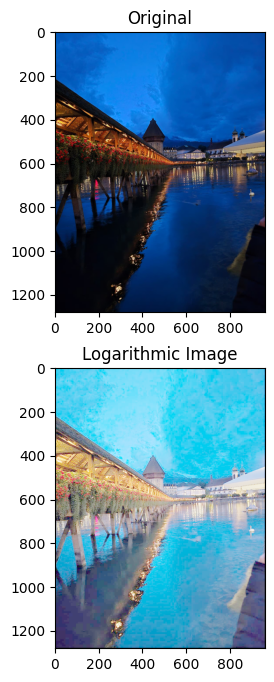

In [17]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(pilImage)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

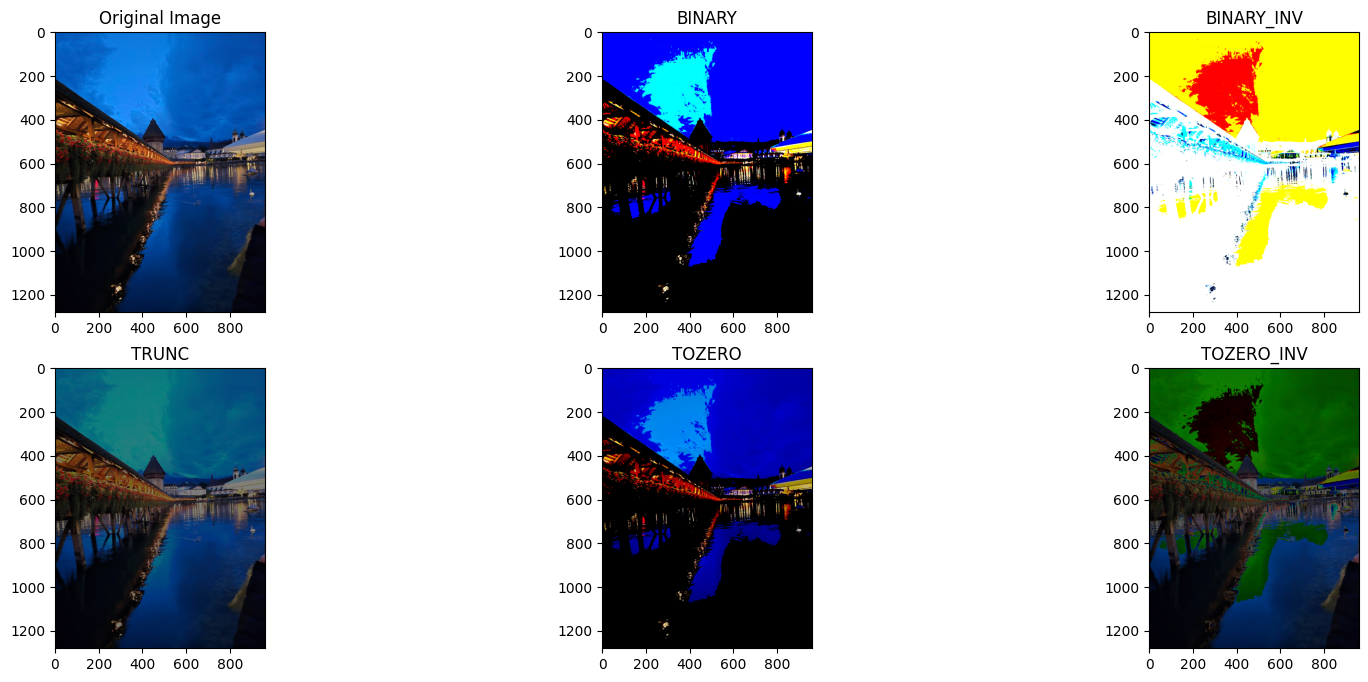

In [18]:
orig_img = cv2.imread("LucernePuente.jpeg")
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

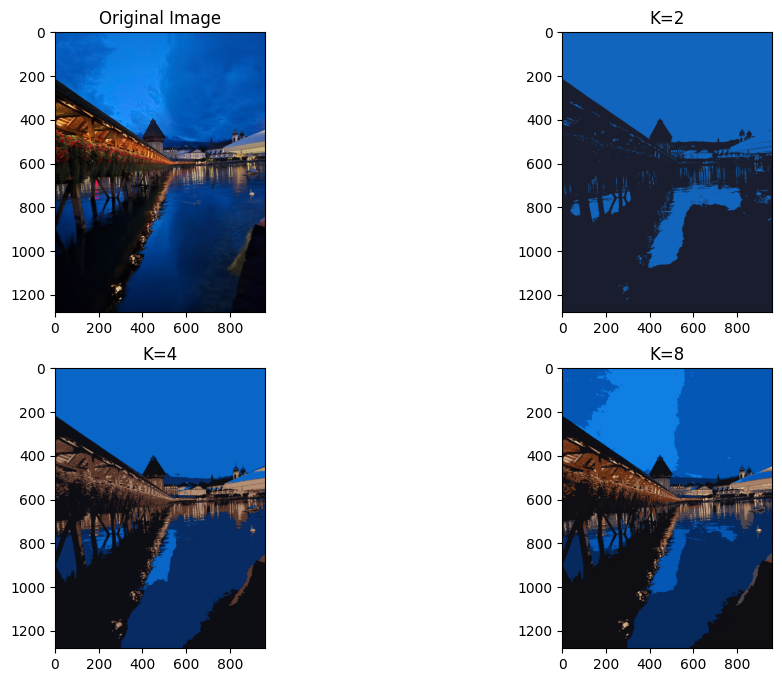

In [19]:
orig_img = cv2.imread("LucernePuente.jpeg")

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()

---
# Reto 1: Técnicas de Mejora de Imágen Pixel a Pixel.

 <p><b>Reto: </b> Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.</p>


## Bit Slicing

## ¿Qué es y cuándo usar el Bit Slicing?

Bit Slicing es una técnica que consiste en descomponer cada píxel de una imagen en sus componentes binarios, cada píxel tiene un valor entre 0 y 255, lo que equivale a 8 bits binarios. Esta técnica analiza cada pixel individualmente para extraer sus bits y es extremadamente útil para metodologías tales como segmentación binaria, análisis de ruido, o inclusive reconstrucción de imágenes.


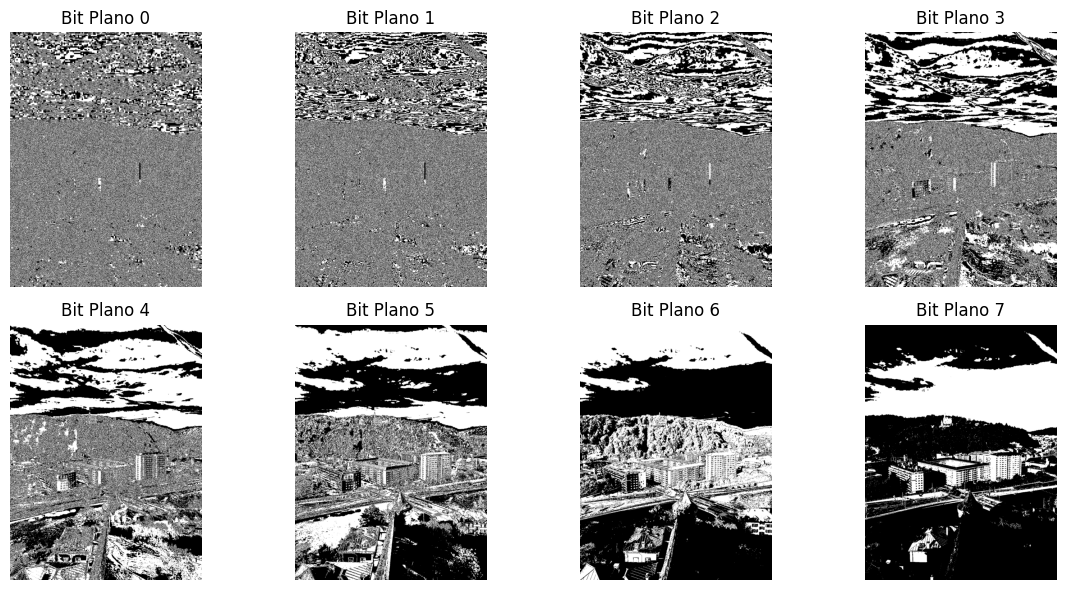

In [20]:
# Cargar imagen en escala de grises ya que necesitamos diferenciarlos con facilidad en blanco y negro.
imagen = cv2.imread("shadowZurich.jpeg", cv2.IMREAD_GRAYSCALE)

# Inicializamos esta lista para poder almacenar los planos de bit que estaremos generando
bit_planes = []

# Ciclo para extraer cada plano de bit
for i in range(8):
    # Usamos operaciones bitwise para extraer el bit i
    bit_plane = cv2.bitwise_and(imagen, 1 << i)

    # Multiplicamos por 255 para visualizarlo (0 o 255) esto es para identificar un bit negro y uno blanco.
    bit_plane = np.where(bit_plane > 0, 255, 0).astype(np.uint8)
    bit_planes.append(bit_plane)

# Mostramos con matplotlib los bits.
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plano {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Observaciones

La técnica de Bit Slicing te permite separar en capas las imágenes, permitiendo ver una foto en sus distintas fases, tales como filmaban anteriormente películas animadas donde los planos se colocaban en distintos enfoques.

Al realizar esta técnica podemos deconstruir, corregir, y reconstruir una imagen, esto sirve ampliamente para separar en distintos planos un ambiente completo.

## Corrección de Sombras

## ¿Cuándo usar corrección de sombras?

La metodología de corrección de sombras es una de las técnicas de procesamiento de imágenes que pueden ser ejecutadas mediante operaciones de pixel a pixel o mediante de histogramas, la diferencia siendo la precisión y velocidad que se quieran manejar, pues al modificar sombras mediante pixeles se puede tener un control preciso sobre elementos clave mientras que histogramas prioriza velocidad y amplitud de impacto.

En general esta técnica es utilizada ampliamente para corregir, modelar, compensar, y hasta reducir las sombras en una imagen o tomografía, extremadamente útil para lograr una imagen con mayor nitidez y menor saturación de color oscuro.

Se podría aplicar en distintas áreas como fotografía digital, detección de imágenes satelitales, fotos de monitoreo de ambiente - tal como deforestaciones, etc.

Al día de hoy siguen habiendo mejoras en esta técnica, dicha técnica considera un proceso de dos técnicas, una de ellas siendo la etapa de espacio latente, este siendo un modelo de entrenamiento con imágenes sombreadas vs las imágenes claras. Así mismo, la etapa de inyección de detalles, donde se refuerza la claridad de los detalles visuales para mejorar la claridad. Todo esto, conlleva con ello la  "mejora el reconocimiento de objetos en entornos complejos, donde las sombras suelen interferir con la detección automática" (Xu, Zheng, Li, Wang, 2024)

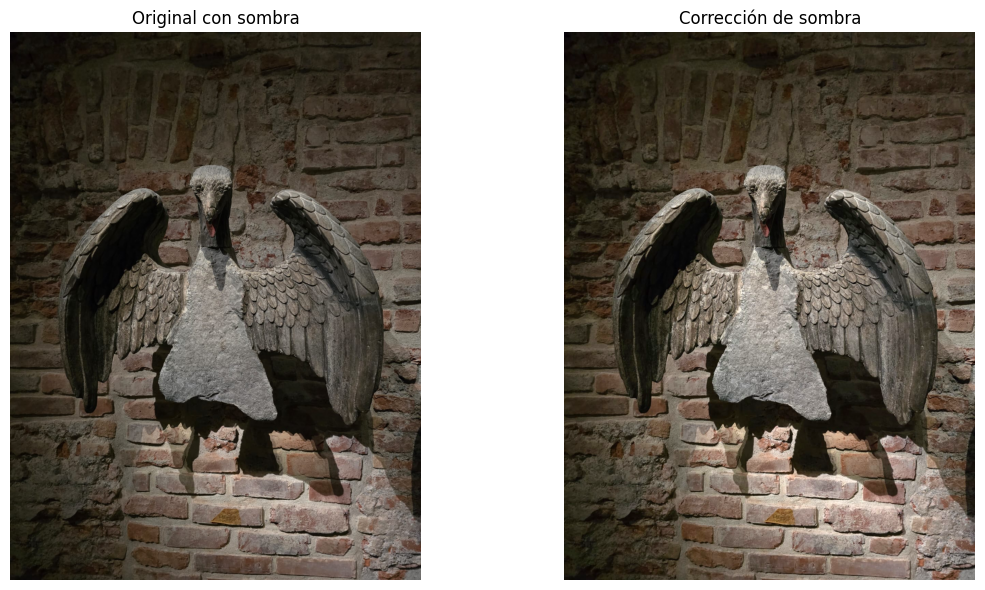

In [21]:
# Cargamos imagen con algunas sombras con cv2
imagen = cv2.imread("StoneBird.jpeg")

# Convertir a espacio HSV - Hue Saturation Value - sirve para manipular saturaciones
# tonos y brillos tal cual lo tiene sus siglas
hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Separar canales de saturación, segmentación y valor.
h, s, v = cv2.split(hsv)

# Normalizar el canal V (luminancia) píxel a píxel, beta ajusta la luminancia del mismo
v_norm = cv2.normalize(v, None, alpha=1, beta=300, norm_type=cv2.NORM_MINMAX)

# Recomponer imagen HSV con luminancia corregida
hsv_corr = cv2.merge((h, s, v_norm))
imagen_corr = cv2.cvtColor(hsv_corr, cv2.COLOR_HSV2BGR)

# Convertir imágenes de BGR a RGB para mostrar con plt para ser lado a lado
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_corr_rgb = cv2.cvtColor(imagen_corr, cv2.COLOR_BGR2RGB)

# Mostrar con matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original con sombra')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_corr_rgb)
plt.title('Corrección de sombra')
plt.axis('off')

plt.tight_layout()
plt.show()




## Observaciones

En el caso de corrección de sombras, es ideal utilizar el método por histograma en vez de pixel a pixel para poder llegar a un espectro alto y estándar por imagen. Como podemos ver al hacerlo pixel a pixel se debe ajustar el beta de la normalización de la iluminancia, esto es propenso a errores de perspectiva y preferencias.

De igual manera es algo complicado tener un buen ejemplo de corrección de sombras de manera natural dado que las cámaras y dispositivos inteligentes ya realizan una corrección, para ello se podría realizar mediante los formatos RAW.

## Ajuste de Brillo y Contraste

## ¿Cuándo ajustar el brillo y contraste?

Existen una gran cantidad de imágenes que fueron capturadas en un entorno donde no se pudo controlar la iluminación. Es en estos casos donde perfectamente se pueden aplicar ajustes de brillo y contraste a imágenes con una iluminación pobre ya sea por sobre-exposición o sub-exposición. Este tipo de ajustes son tan comunes que estas funcionalidades ya se encuentran integradas en la cámara predeterminada de cualquier dispositivo móvil, para que el usuario pueda realizar los ajustes de forma sencilla por medio de una interfaz amigable. Internamente, cada vez que se realiza este tipo de ajustes, se involucran operaciones de nivel pixel a pixel.

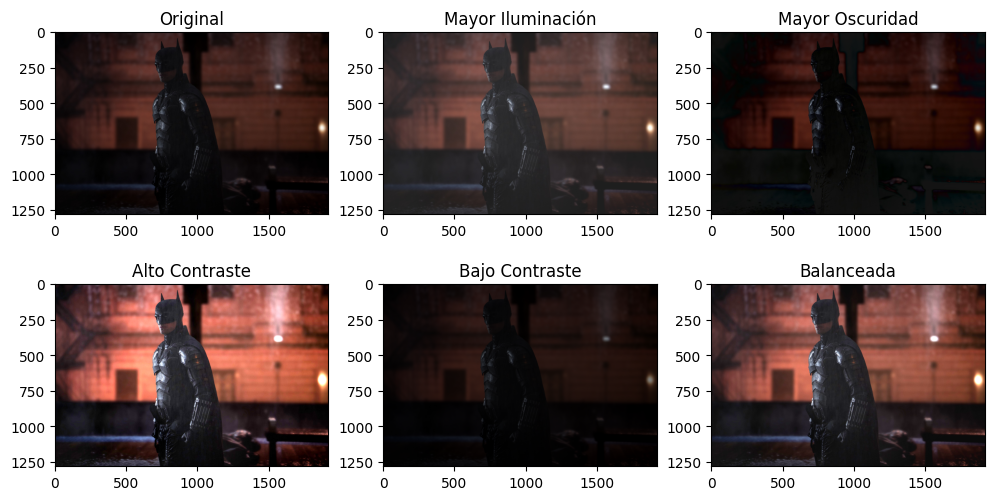

In [32]:
# Cargar imagen con poca iluminación
img_og = cv2.imread("Batman.jpg")
img_og = cv2.cvtColor(img_og, cv2.COLOR_BGR2RGB)

# Aplicar mayor iluminación sin cambiar contraste
img_bright = cv2.convertScaleAbs(img_og, alpha=1, beta=30)

# Aplicar menor iluminación sin cambiar contraste
img_dark = cv2.convertScaleAbs(img_og, alpha=1, beta=-20)

# Aplicar mayor contraste sin cambiar iluminación
img_high_contrast = cv2.convertScaleAbs(img_og, alpha=3, beta=0)

# Aplicar menor contraste sin cambiar iluminación
img_low_contrast = cv2.convertScaleAbs(img_og, alpha=0.5, beta=0)

# Aplicar un poco más de iluminación y contraste
img_fix = cv2.convertScaleAbs(img_og, alpha=2, beta=10)

# Graficar imágenes por medio de matplotlib
fig = plt.figure(figsize=(12,6))

imgs = [img_og, img_bright, img_dark, img_high_contrast, img_low_contrast, img_fix]
imgs_titles = ["Original", "Mayor Iluminación", "Mayor Oscuridad", "Alto Contraste", "Bajo Contraste", "Balanceada"]

for i in range(6):
  plt.subplot(2,3,i + 1)
  plt.imshow(imgs[i])
  plt.title(imgs_titles[i])

plt.show()

## Observaciones

Para este ejemplo se empleó una fotografía tomada desde el set de grabación de la película de The Batman, en la cual se puede observar que existe poca iluminación. Normalmente este tipo de detalles son arreglados durante la postproducción de una película. En el ejemplo se muestran diversas configuraciones en los parámetros para ajustar el brillo y contraste de la imagen.

Primeramente, se puede observar el resultado de la imagen cuando se le aplica mayor iluminación al sumarle una constante grande a todos los pixeles de la imagen, en efecto la imagen se ve un poco más clara pero no definida. Al disminuir la iluminación en la imagen al restarle una constante grande a todos los pixeles de la imagen se ve muy oscura.

Al multiplicar los pixeles de la imagen por una constante mayor a 1 se obtiene un contraste mayor en la imagen, más definición, pero los colores se ven un poco saturados. Cuando se dividen los pixeles de la imagen por una constante se obtiene un contraste menor en la imagen, menos definición.

Cuando se le suma una constante adecuada a cada pixel de la imagen y se multiplican por una constante conveniente para ajustar el brillo y contraste a la vez, se puede observar en la última imagen que se logra obtener una imagen con mayor iluminación, con mejor definición y con colores más controlados.

## Escalado Lineal

## ¿Cuándo utilizar escalado lineal?

Esta metodología es de suma utilidad cuando se quiere hacer un enfoque en mejorar el contraste de una imagen, en este caso no es recomendable hacerlo en escala de grises pues el detalle se notará más en colores, especialmente los que son sencillamente identificados por el ojo humano como es el verde.

Esta técnica es muy útil cuando zonas apagadas necesitan un poco más de vida, cuando se necesita saturar un poco más la imagen sin llegar a ser invasiva para el detalle original pues se conserva sin perder claridad, exactitud o resolución.

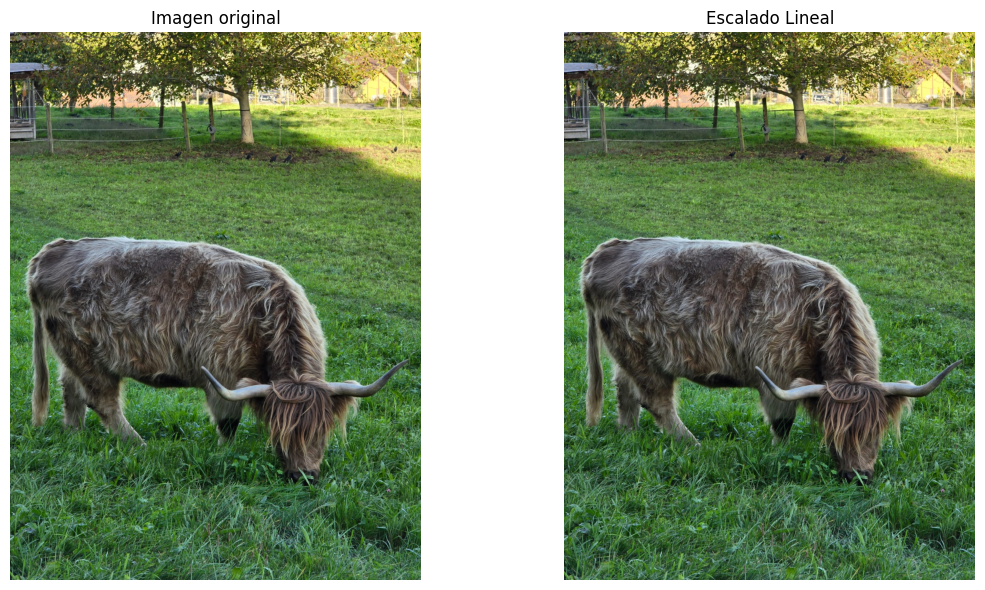

In [23]:
imagen = cv2.imread("HighlandCow.jpeg")
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
a = np.min(imagen)
b = np.max(imagen)

# Escalado lineal píxel a píxel - Esta viene siendo  una fórmula establecida.
imagen_escalada = ((imagen - a) / (b - a) * 255).astype(np.uint8)

# Mostrar ambas imágenes para comparar
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imagen_escalada)
plt.title('Escalado Lineal')
plt.axis('off')

plt.tight_layout()
plt.show()



## Observaciones.

Para este ejemplo, tenemos un caso donde se resaltan los detalles de los pelos de la vaca salvaje, es útil para mostrar los detalles del pelaje y dar a notar su principal distintivo. De igual manera podemos observar en el césped detrás, así como el árbol, que se entra a más profundidad el color verde, esto da la impresión de un ambiente de paz y vivo.

Esta técnica es muy buena para darle un toque de vida a las imágenes y corregir la sub-saturación de las mismas, sin embargo se debe tener cuidad de que no llegue a rayar en los exagerado y se pierda la naturaleza del mismo.

-----------------------------------------
# Reto 2: El Negativo de una Imágen - Negative

<p><b>Reto:</b> Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.</p>

### ¿Cuándo usar el negativo de una imagen?

Existen múltiples casos para el uso del negativo de una imagen, en este caso nos enfocaremos en un caso de uso de la fotografía, donde tiene el gran beneficio de preservar la mayor cantidad de detalles.

De acuerdo al artículo publicado por UMA Technology, "El manejo de negativos habilita al editor a controlar la exposición de colores y contrastes de manera eficiente, ayudando a corregir e identificar áreas de mejora en una imagen" [3]





In [24]:
def generarNegativo(image):
  return 255 - image

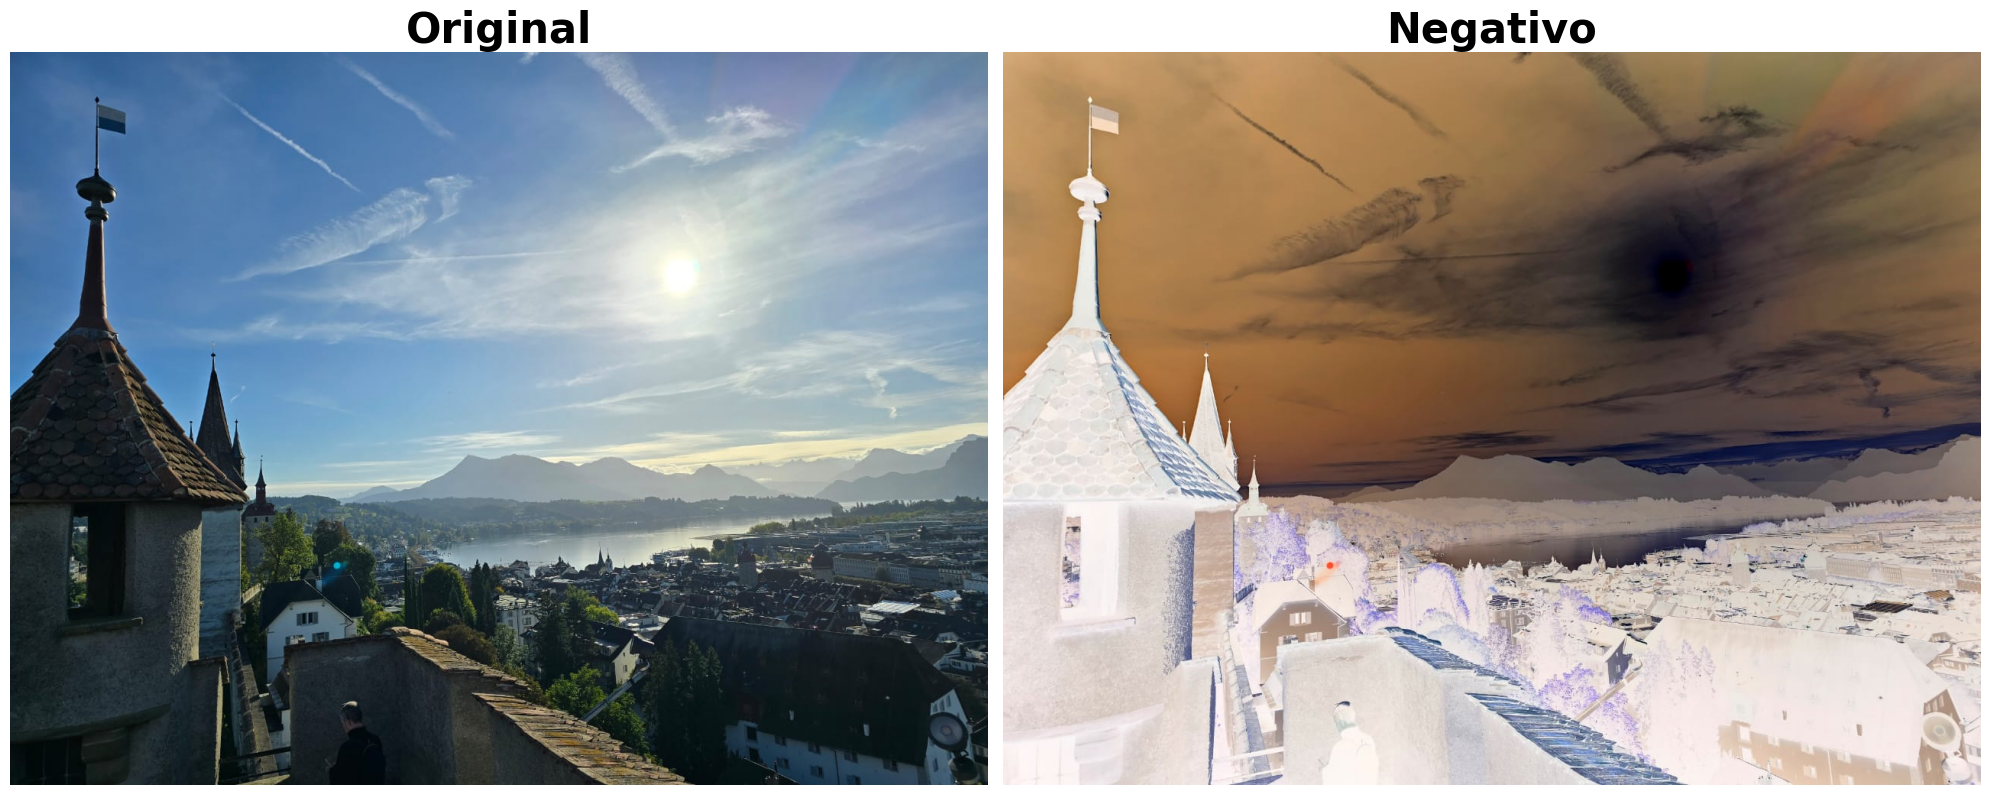

In [25]:
# Cargamos imagen original
ex2ImagePath = "LucerneWall.jpeg"
ex2_image = cv2.imread(ex2ImagePath)

# Corregimos el color de la imagen por la diferencia de BGR a RGB con CV2
ex2_image = cv2.cvtColor(ex2_image, cv2.COLOR_BGR2RGB)

# Generamos negativo mandando a llamar la funcion negativo.
ext_imageNegative = generarNegativo(ex2_image.copy())

# Para desplegarlas lado a lado lo generaremos en un subplot de 2 columnas.
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].imshow(ex2_image)
axs[0].set_title('Original', fontsize=30, fontweight='bold')
axs[0].axis('off')

axs[1].imshow(ext_imageNegative)
axs[1].set_title('Negativo', fontsize=30, fontweight='bold')
axs[1].axis('off')

# Mostramos las imágenes.
plt.tight_layout()
plt.show()

## Observaciones

Como podemos observar en el ejercicio anterior, las sombras de las montañas son más pronunciadas, incluso la que aparece oculta por neblina en el centro de las 3 montañas de la imagen original, ahora se resalta al hacer un negativo.

Las nubes en el negativo se muestran con considerable detalle, así como el lago. Este ejemplo demuestra que en caso de necesitar resaltar elementos que a primera vista parecen ocultos, se pueda manipular la imagen para que estos elementos individuales resalten y sean más sencillos de visualizar.

----------------------
# Reto 3: Gamma de una Imagen

<p><b>Reto: </b> Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.</p>

### ¿Cuándo utilizar corrección Gamma para las imágenes?

Dentro del área de la fotografía, la corrección Gamma tiene la suma utilidad de poder manipular, ya sea resaltando o atenuando, las sombras para poder brindar mayores detalles en la imagen que normalmente serían perdidos. De acuerdo con Acadaemia Lab "[...] ajusta la luminancia de la imagen para alinearse con la forma que se percibe el brillo" [2]

No solo en la fotografía se puede utilizar sino también en imágenes médicas para resaltar detalles de escaneo, gráficos de computadora para simular realismo, así como en análisis forense de video.

Algunas ventajas de este método es que la calidad de la fuente no es afectada en absoluto, mantiene la calidad sin comprometer funcionalidad.

Técnicamente, en cuanto al valor de Gamma, mientras más cercano a 0 se encuentre su valor, la función de la corrección Gamma generará una curva de mapeo en donde los pixeles oscuros tenderán a aclararse; por otro lado, mientras más grande que 1 se encuentre su valor, la función de la corrección Gamma generará una curva de mapeo en donde los pixeles claros tenderán a oscurecerse.

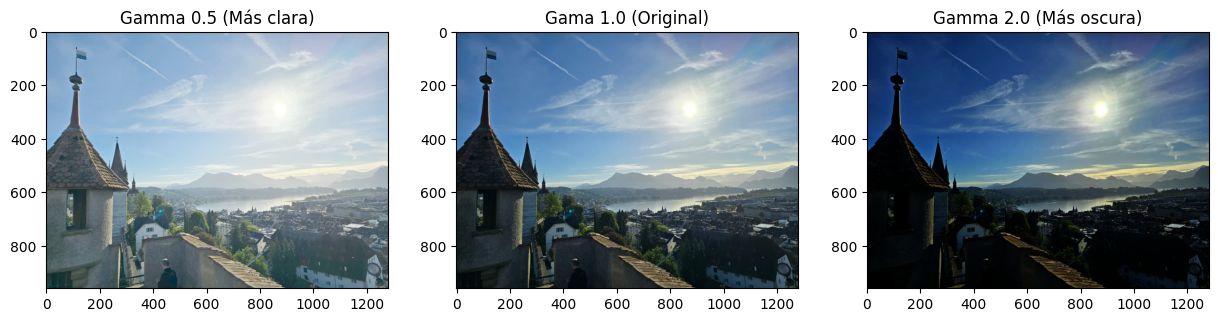

In [33]:
# Se carga una imagen original
img = cv2.imread("LucerneWall.jpeg")

# Se aplica la corrección de gama con 3 valores
gamma_05= np.array(255*(img / 255) ** 0.5, dtype = 'uint8')   # Para más clara
gamma_10= np.array(255*(img / 255) ** 1.0, dtype = 'uint8')   # Para conservar la imagen original
gamma_20= np.array(255*(img / 255) ** 2.0, dtype = 'uint8')   # Para más oscura

# Se grafican las imágenes por medio de matplotlib
fig = plt.figure(figsize=(15, 5))

plt.subplot(131),plt.imshow(cv2.cvtColor(gamma_05, cv2.COLOR_BGR2RGB))
plt.title('Gamma 0.5 (Más clara)')

plt.subplot(132),plt.imshow(cv2.cvtColor(gamma_10, cv2.COLOR_BGR2RGB))
plt.title('Gama 1.0 (Original)')

plt.subplot(133),plt.imshow(cv2.cvtColor(gamma_20, cv2.COLOR_BGR2RGB))
plt.title('Gamma 2.0 (Más oscura)')

plt.show()


## Observaciones

Con la corrección de gamma es interesante saber utilizar el caso de uso y comprender que el valor parametrizado de dicha variable logra alterar la imagen. De esta manera podemos controlar la imagen para resaltar elementos que se encuentren oscurecidos o sobre-expuestos en una imagen, no necesariamente de fotografía, sino también de escaneo médico como rayos X o tomografías, hasta videojuegos con corrección de rayos.

-----------------
# Reto 4: Sustracción de Imagen

<p><b>Reto: </b>Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.</p>

## ¿Cuándo utilizar sustracción de imágenes?

Para esta técnica podemos identificar una cantidad significativa de casos de uso. Este tipo de técnica nos ayuda a comparar una imagen en distintos momentos y estados, con el cuál podemos detectar un cambio dentro del ambiente. Algunas aplicaciones para esta técnica son:

1. El avance en los años de Google Maps, donde podemos observar las diferencias a través del tiempo.
2. Analizar el avance de alguna enfermedad basándonos en la evolución de tomografías médicas.
3. Eliminación de objetos en movimiento, tales como un callejón altamente poblado, al detectar la gente moviéndose en múltiples imágenes se pueden remover y quedarnos solo con el objeto enfocado

Ahondando un poco sobre la eliminación de movimiento, no solamente se han hecho avances en comparación de fotogramas, sino que se han estado incorporando "características como la textura, la distribución de intensidades, escala de grises, color, y de esta manera mejorar la clasificación de cada píxel" (Cerdeira & Rodríguez, 2020). Con esta aplicación podemos mejorar la detección de movimiento y seguridad de las cámaras de vigilancia.

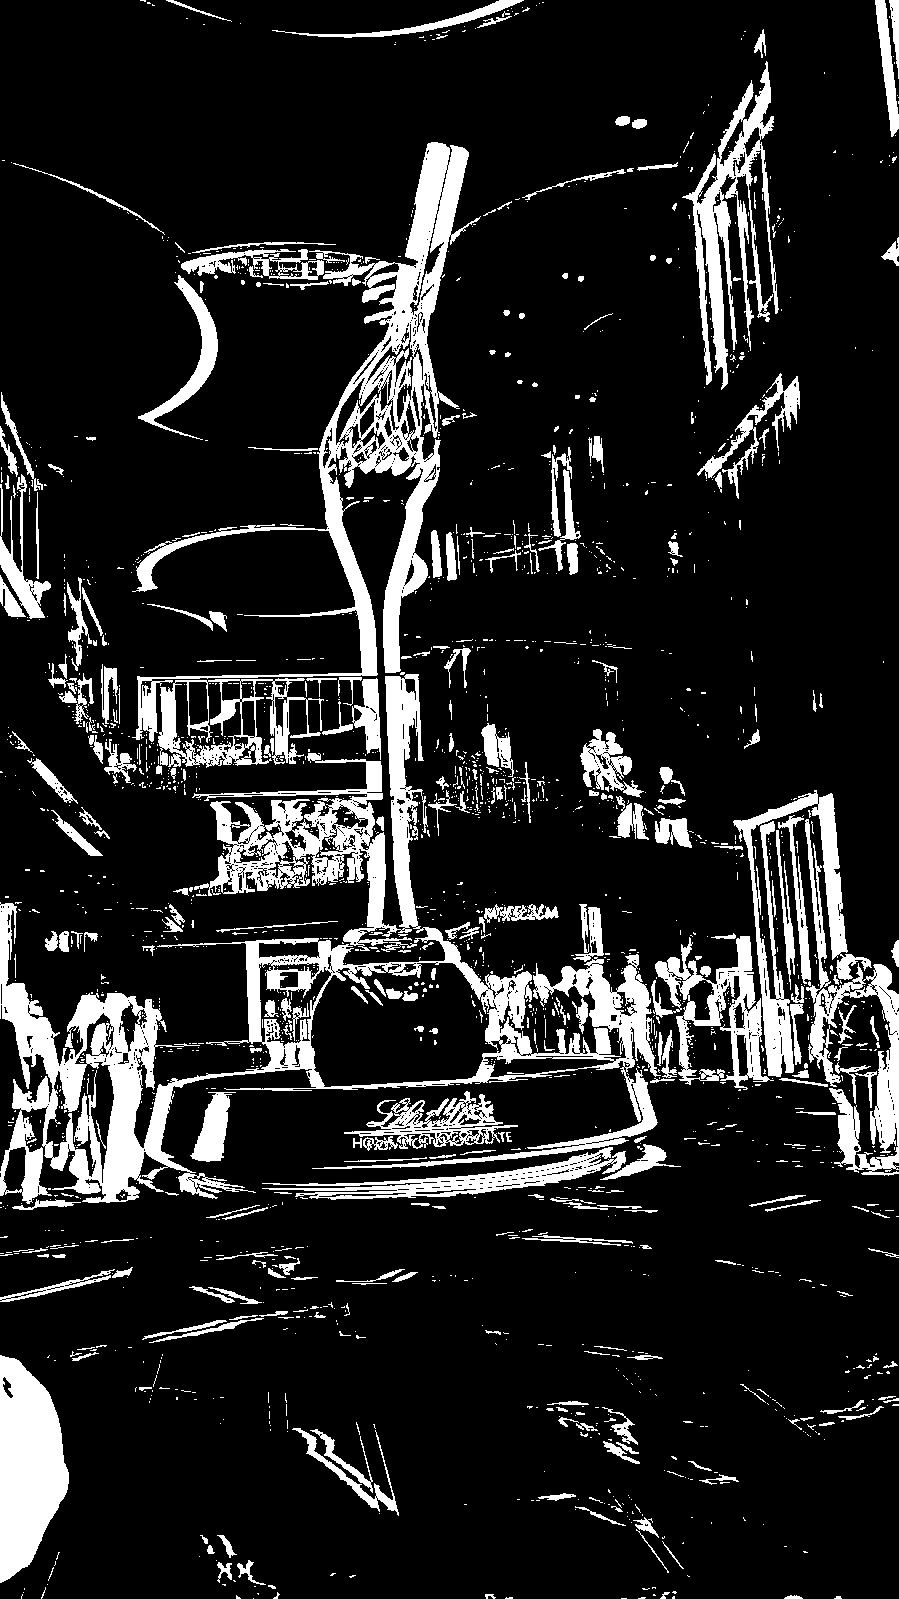

In [27]:
sustraccion_imagen1 = cv2.imread("Lindt1.jpg")
sustraccion_imagen2 = cv2.imread("Lindt2.jpeg")

# Convertir a escala de grises para simplificar
gris1 = cv2.cvtColor(sustraccion_imagen1, cv2.COLOR_BGR2GRAY)
gris2 = cv2.cvtColor(sustraccion_imagen2, cv2.COLOR_BGR2GRAY)

# Aplicar la sustracción
resultado = cv2.absdiff(gris2, gris1)

# Aplicar un umbral para resaltar diferencias
_, umbral = cv2.threshold(resultado, 30, 255, cv2.THRESH_BINARY)

# Mostrar resultados
cv2_imshow(umbral)


## Observaciones

En este caso podemos observar un ejemplo en el que la imagen es convertida a blanco y negro para simplificarlo, ya que la aplicación es lograr encontrar si hubo movimiento en dos fotogramas comparados. Lo que se encuentra en blanco es movimiento, dado que fue tomado con una cámara sin tripié, se detecta bastante movimiento; sin embargo, siendo un objeto fijo aumenta la fiabilidad del proceso.

Se pueden definir umbrales en los cuáles se considere la sensibilidad de la comparativa y así lograr una detección de movimiento satisfactoria.

-----------------
# Conclusiones

Como resultado de esta actividad se lograron implementar diversos métodos de operación pixel a pixel, donde en cada ejemplo se logró implementar código y mostrar las imágenes transformadas.

Igualmente, a través de esta actividad se puede demostrar la complejidad de los procesos que involucran esta clase de transformaciones en las imágenes, y cómo es que diversas interfaces como la cámara de un celular o editores de video sintetizan toda esta clase de operaciones para simplificar la edición de imágenes para usuarios cotidianos.

Por medio de este trabajo se analizaron y demostraron las diferentes aplicaciones que pueden tener las operaciones pixel a pixel. Pero sobre todo, al experimentar con imágenes propias, se demuestra que se pueden implementar este tipo de operaciones para lograr efectos que sean útiles en las imágenes y puedan ser empleadas en un futuro para mejorar imágenes de un dataset, resaltar información dentro de las mismas y volverlos elementos más precisos para el entrenamientos de modelos de visión artificial.

-----------------
# Bibliografia

[1] Academia Lab. (2025). Corrección gamma. Enciclopedia. Revisado el 17 de septiembre del 2025. https://academia-lab.com/enciclopedia/correccion-gamma/

[2] Cerdeira, H., & Rodríguez, M. (2020). Sustracción de fondo por varias características estables en el modelo. Universidad Nacional de La Plata. Repositorio SEDICI. https://sedici.unlp.edu.ar/handle/10915/89175

[3] UMA Technology. (2023, July 18). Images display like negative film. https://umatechnology.org/solved-images-display-like-negative-film/

[4] Xu, J., Zheng, Y., Li, Z., Wang, C., Gu, R., Xu, W., & Xu, G. (2024). Detail-Preserving Latent Diffusion for Stable Shadow Removal. arXiv. https://doi.org/10.48550/arXiv.2412.17630






#